In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

In [2]:
pwd

'C:\\Users\\Mrunali\\Project'

Loading Dataset

In [3]:
df= pd.read_csv('C:/Users/Mrunali/Downloads/Train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


Pre-Processing Data Analysis

In [4]:
df.shape

(10999, 12)

In [5]:
# To chech whether there is null value present in the data.
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
# To check if there are any duplicates present in the data.
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10994    False
10995    False
10996    False
10997    False
10998    False
Length: 10999, dtype: bool

In [8]:
# setting 'ID' column as index
df.set_index("ID", inplace = True)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10997,C,Ship,5,4,242,5,low,F,4,1155,0


# Exploratory Data Analysis(EDA)

In [9]:
# to analyze the statistics of a data
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [10]:
# non-delayed deliveries
df[df['Reached.on.Time_Y.N'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,4436.0,4.147656,1.162771,2.0,3.0,4.0,5.0,7.0
Customer_rating,4436.0,2.967989,1.414808,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,4436.0,214.498647,47.757432,97.0,174.0,222.0,254.0,310.0
Prior_purchases,4436.0,3.670424,1.525444,2.0,3.0,3.0,4.0,10.0
Discount_offered,4436.0,5.545987,2.877727,1.0,3.0,6.0,8.0,10.0
Weight_in_gms,4436.0,4168.668395,1573.954178,1001.0,4043.5,4674.0,5337.0,6000.0
Reached.on.Time_Y.N,4436.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [11]:
# delayed deliveries
df[df['Reached.on.Time_Y.N'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,6563.0,3.991467,1.122592,2.0,3.0,4.0,5.0,7.0
Customer_rating,6563.0,3.005790,1.412692,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,6563.0,207.289197,48.054876,96.0,167.0,209.0,249.0,310.0
Prior_purchases,6563.0,3.498095,1.517285,2.0,3.0,3.0,4.0,10.0
Discount_offered,6563.0,18.663721,19.108797,1.0,5.0,9.0,32.0,65.0
Weight_in_gms,6563.0,3272.640104,1576.148391,1001.0,1735.5,3231.0,4696.5,7846.0
Reached.on.Time_Y.N,6563.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [12]:
df.value_counts("Reached.on.Time_Y.N")

Reached.on.Time_Y.N
1    6563
0    4436
dtype: int64

<AxesSubplot:xlabel='Reached.on.Time_Y.N'>

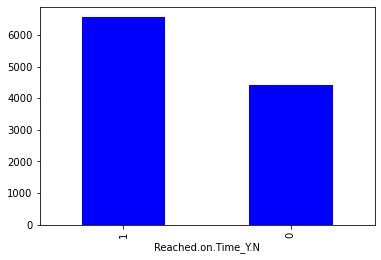

In [13]:
df['Reached.on.Time_Y.N'].value_counts().plot(kind='bar',color='b',xlabel = 'Reached.on.Time_Y.N')

In [38]:
df['Reached.on.Time_Y.N'].mean()

0.5966906082371125

About 60% of products delivered are delayed by the company.

In [14]:
df.value_counts("Warehouse_block")

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
dtype: int64

<AxesSubplot:xlabel='Warehouse_block'>

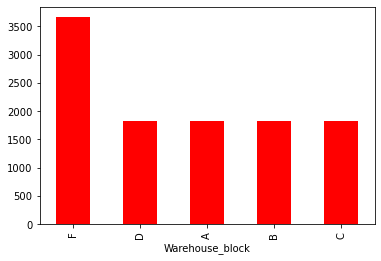

In [15]:
df['Warehouse_block'].value_counts().plot(kind='bar',color='r',xlabel ='Warehouse_block')

The company mostly use Warehouse Block-F for packages.

In [16]:
df.value_counts('Mode_of_Shipment')

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
dtype: int64

<AxesSubplot:xlabel='Mode_of_Shipment'>

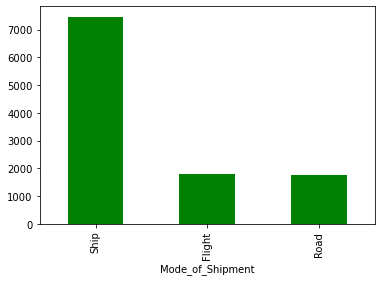

In [17]:
df['Mode_of_Shipment'].value_counts().plot(kind='bar',color='g',xlabel = 'Mode_of_Shipment')

The company makes use of ship as a mode of shipment to deliver packages.

In [18]:
df.value_counts('Customer_care_calls')

Customer_care_calls
4    3557
3    3217
5    2328
6    1013
2     638
7     246
dtype: int64

<AxesSubplot:xlabel='Customer_care_calls'>

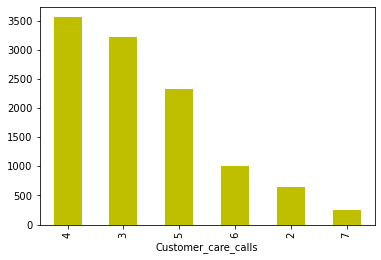

In [19]:
df['Customer_care_calls'].value_counts().plot(kind='bar',color='y',xlabel = 'Customer_care_calls')

In [20]:
df.value_counts('Customer_rating')

Customer_rating
3    2239
1    2235
4    2189
5    2171
2    2165
dtype: int64

<AxesSubplot:xlabel='Customer_rating'>

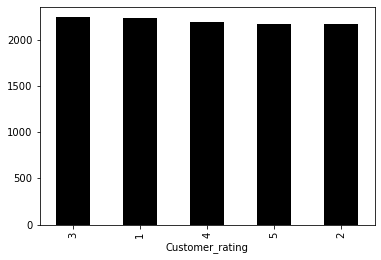

In [21]:
df['Customer_rating'].value_counts().plot(kind='bar',color='k',xlabel ='Customer_rating' )

In [22]:
df.value_counts('Prior_purchases')

Prior_purchases
3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
dtype: int64

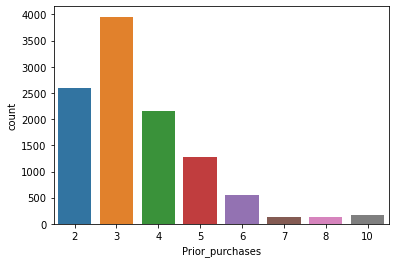

In [23]:
sns.countplot(x = 'Prior_purchases',data = df)
plt.show()

In [24]:
df.value_counts('Product_importance')

Product_importance
low       5297
medium    4754
high       948
dtype: int64

Product importance is products categorized by the company based on value using parameters such as low, medium, and high. From the chart,the distribution of product importance with low-value product (5297) being the highest followed by medium-value product (4754) and the least is high-value product (948).


<AxesSubplot:xlabel='Product_importance'>

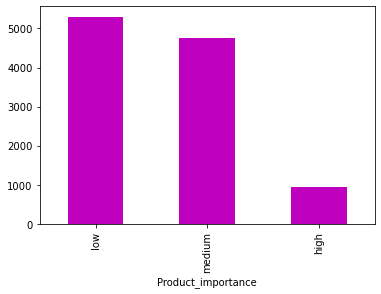

In [25]:
df['Product_importance'].value_counts().plot(kind='bar',color='m',xlabel = 'Product_importance')

In [26]:
df.value_counts('Gender')

Gender
F    5545
M    5454
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Count'>

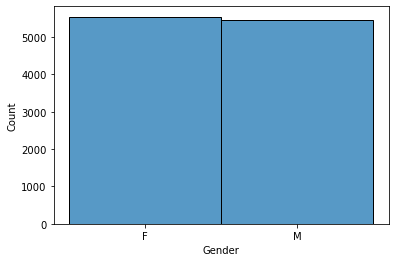

In [27]:
sns.histplot(df.Gender)

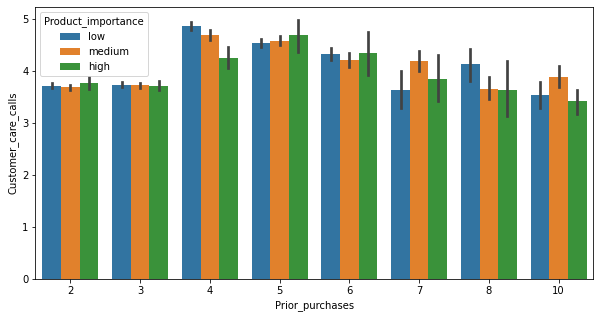

In [28]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Prior_purchases', y = 'Customer_care_calls', data = df, hue = 'Product_importance')
plt.show()

In [29]:
#assigning names to binary values
def Reached_yn(i):
    if i==0:
        return "On Time"
    return "Delayed"
df['Reached']=df['Reached.on.Time_Y.N'].apply(Reached_yn)
df['Reached'].unique() 

array(['Delayed', 'On Time'], dtype=object)

 Variable Categorization

In [30]:
numcols = df.select_dtypes(include=[np.number])
numcols.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [31]:
df.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


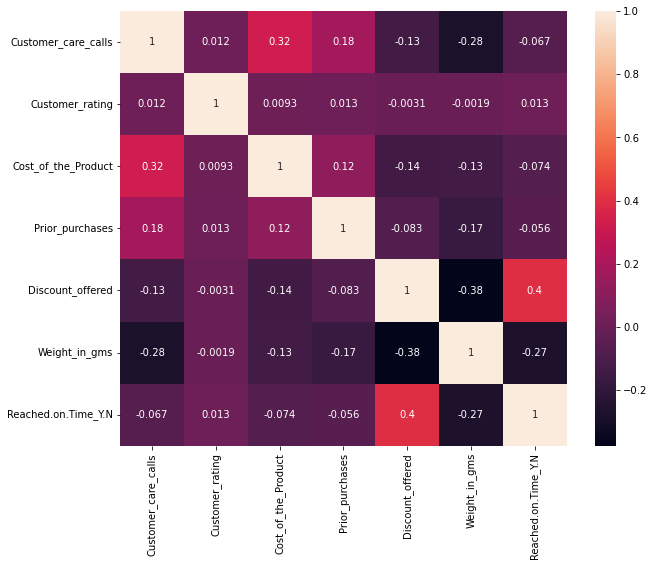

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True);

In [33]:
catcols = df.select_dtypes(include='object')
catcols.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender',
       'Reached'],
      dtype='object')

In [34]:
# Categorical data
categorical = ['warehouse_block','mode_of_shipment','product_importance', 'gender']
# Numerical data
numeric = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

Presence of Outliers and its treatment

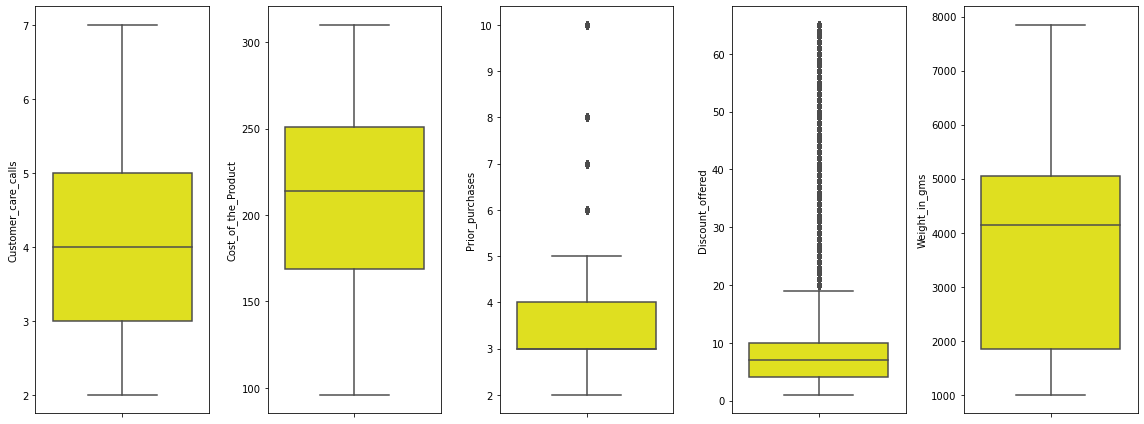

In [35]:
# using boxplot

plt.figure(figsize=(16,6))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.boxplot(y=df[numeric[i]], color='yellow')
    plt.plot()
plt.tight_layout();

We found outliers in discount_offered & prior_purchases with almost 30% of data.

In [36]:
#  Handling outlier with replacing the value with upper_bound or lower_bound 
for col in ['Prior_purchases', 'Discount_offered']:
    # Initiate Q1
    Q1 = df[col].quantile(0.25)
    # Initiate Q3
    Q3 = df[col].quantile(0.75)
    # Initiate IQR
    IQR = Q3 - Q1
    # Initiate lower_bound & upper_bound 
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    # Filtering outlier & replace with upper_bound or lower_bound 
    df[col] = np.where(df[col] >= upper_bound,
                         upper_bound, df[col])
    df[col] = np.where(df[col] <= lower_bound,
                         lower_bound, df[col])

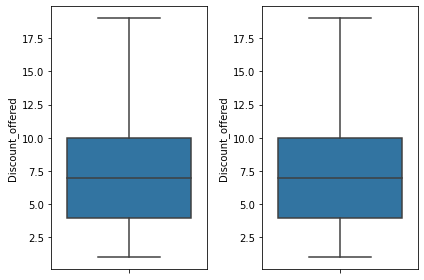

In [37]:
#After Handling of outliers
for i in range(0, len(['Prior_purchases', 'Discount_offered'])):
               plt.subplot(1,2,i+1)
               sns.boxplot(y= df[col]);
               plt.tight_layout();

In [39]:
# Since the purpose of this data is to predict whether or not it will Reach on time, 
# we calculate the Correlation of the Reached.on.Time_Y.N column.
df.corr()['Reached.on.Time_Y.N'].sort_values()

Weight_in_gms         -0.268793
Prior_purchases       -0.074934
Cost_of_the_Product   -0.073587
Customer_care_calls   -0.067126
Customer_rating        0.013119
Discount_offered       0.410716
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64

C:\Users\Mrunali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mrunali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mrunali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mrunali\anaconda

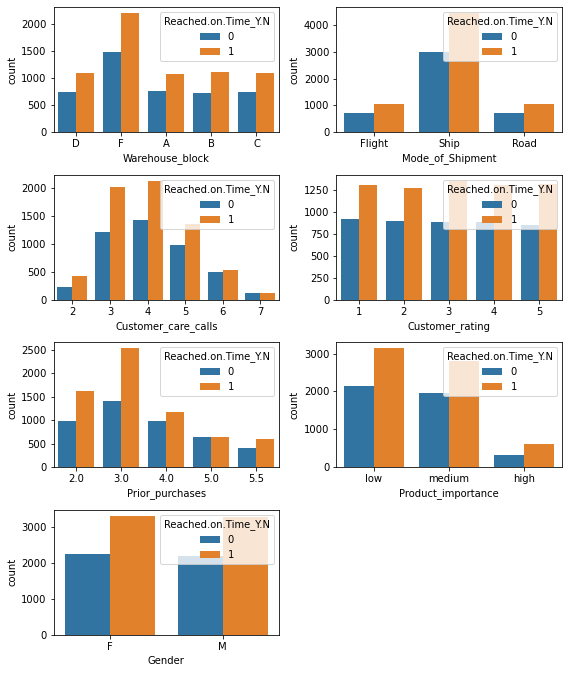

In [40]:
# Exploring the relationship between Reached.on.Time_Y.N and other attributes
columns = ["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", 
"Customer_rating", "Prior_purchases", "Product_importance", "Gender"]
plt.figure(figsize = (8, 16))
plotnumber = 1
for i in range(len(columns)):
    if plotnumber <= 10:
        ax = plt.subplot(7, 2, plotnumber)
        sns.countplot( columns[i], hue ='Reached.on.Time_Y.N',  data = df, ax=ax)
    plotnumber += 1
plt.tight_layout()    
plt.show()


In [41]:
df.groupby(['Mode_of_Shipment','Reached'])['Cost_of_the_Product'].sum()

Mode_of_Shipment  Reached
Flight            Delayed    220845
                  On Time    151093
Road              Delayed    214276
                  On Time    156161
Ship              Delayed    925318
                  On Time    644262
Name: Cost_of_the_Product, dtype: int64

In [42]:
df.groupby(['Customer_rating','Reached'])['Customer_rating'].sum()

Customer_rating  Reached
1                Delayed    1313
                 On Time     922
2                Delayed    2546
                 On Time    1784
3                Delayed    4071
                 On Time    2646
4                Delayed    5212
                 On Time    3544
5                Delayed    6585
                 On Time    4270
Name: Customer_rating, dtype: int64

<AxesSubplot:xlabel='Customer_care_calls', ylabel='Customer_rating'>

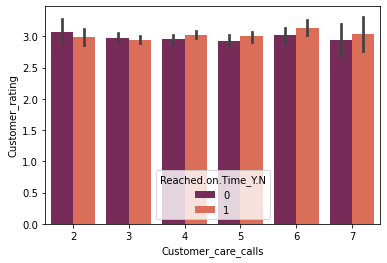

In [43]:
sns.barplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Reached.on.Time_Y.N', data = df, palette = 'rocket')

The chart above is showing the effects of delivery on customer rating.Most of the customers are experiencing delayed delivery which is matching the overall average rating to delayed delivery of the entire product. Rating 2 and below is matching with the overall average of product delivered on time hence we can say that the slower the product gets delivered the lower the customer rating.

In [44]:
df.groupby(['Customer_care_calls','Reached'])['Customer_care_calls'].sum()

Customer_care_calls  Reached
2                    Delayed     832
                     On Time     444
3                    Delayed    6033
                     On Time    3618
4                    Delayed    8504
                     On Time    5724
5                    Delayed    6800
                     On Time    4840
6                    Delayed    3138
                     On Time    2940
7                    Delayed     889
                     On Time     833
Name: Customer_care_calls, dtype: int64

An average customer calls about 3 or 4 times on shipping inquiry. Also, the customers with delayed delivery made more calls to customer care compared to customers whose packages got delivered on time. This show that costumers query are not been answered therefore they called customer care more than once.

Approx. 80% of customers make 3-5 calls.Customers who call more frequently, have their shipments delivered in time more often.

In [45]:
df.groupby(['Product_importance','Reached'])['Product_importance'].count()

Product_importance  Reached
high                Delayed     616
                    On Time     332
low                 Delayed    3140
                    On Time    2157
medium              Delayed    2807
                    On Time    1947
Name: Product_importance, dtype: int64

<AxesSubplot:xlabel='Product_importance', ylabel='Customer_care_calls'>

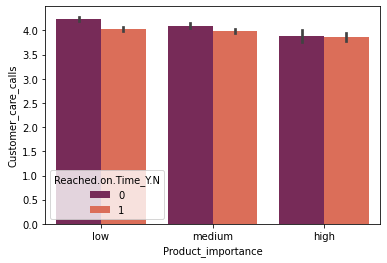

In [46]:
sns.barplot(x ='Product_importance',y ='Customer_care_calls',data = df,hue = 'Reached.on.Time_Y.N',palette='rocket')

The relationship between delivery and product importance. All the products irrespective of the importance level has higher delivery delay compared to products delivered on time. 
The statistics of customers rating the high-value products,on an approx. the customer gave 60% positive response and 40% negative response for the high-value products.

<AxesSubplot:xlabel='Product_importance', ylabel='Cost_of_the_Product'>

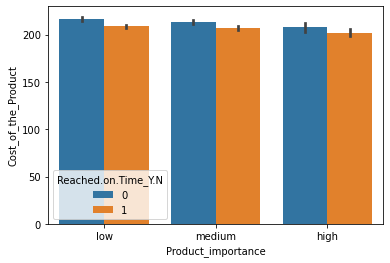

In [47]:
sns.barplot(x ='Product_importance',y ='Cost_of_the_Product',data = df,hue = 'Reached.on.Time_Y.N')

Even for high product cost there is no product importance.

In [48]:
df.groupby(['Discount_offered','Reached'])['Discount_offered'].count()

Discount_offered  Reached
1.0               Delayed     397
                  On Time     427
2.0               Delayed     415
                  On Time     443
3.0               Delayed     401
                  On Time     439
4.0               Delayed     380
                  On Time     445
5.0               Delayed     378
                  On Time     432
6.0               Delayed     387
                  On Time     462
7.0               Delayed     407
                  On Time     433
8.0               Delayed     376
                  On Time     425
9.0               Delayed     374
                  On Time     471
10.0              Delayed     401
                  On Time     459
11.0              Delayed      46
12.0              Delayed      72
13.0              Delayed      44
14.0              Delayed      41
15.0              Delayed      49
16.0              Delayed      40
17.0              Delayed      48
18.0              Delayed      45
19.0              Dela

Deliveries with discount greater than 10, have all been delayed.

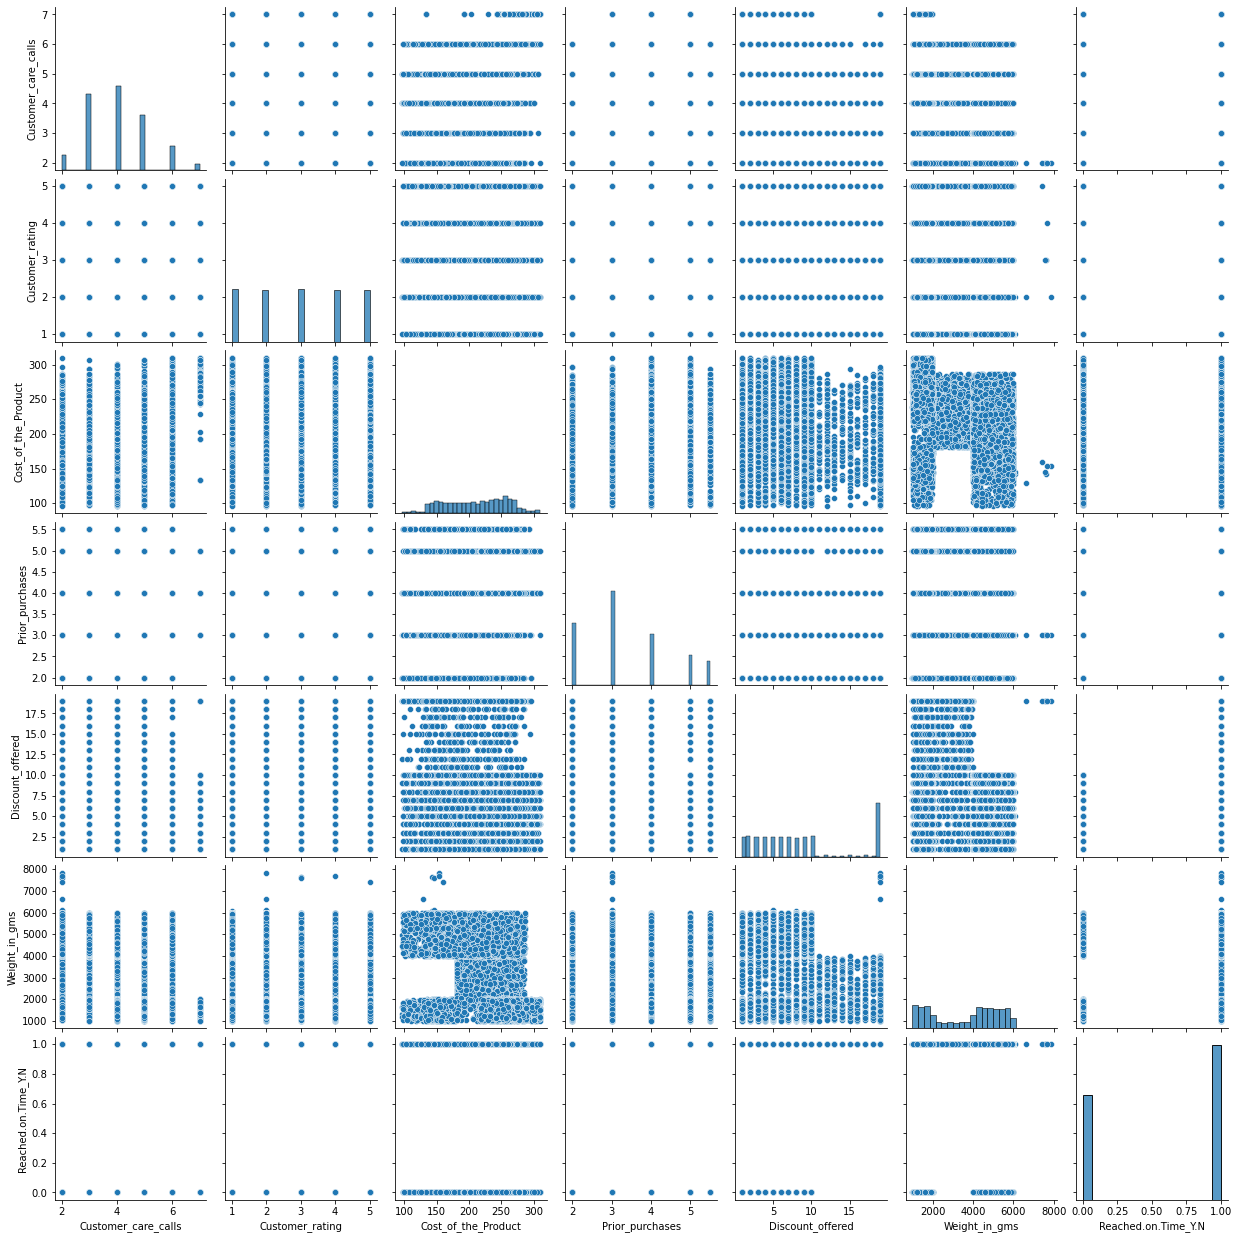

In [49]:
sns.pairplot(df)

# Feature Engineering

In [50]:
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].replace(['Flight','Road','Ship'], [0,1,2])

In [51]:
df['Gender'] = df['Gender'].replace(['M','F'], [0,1])

In [52]:
df['Product_importance'] = df['Product_importance'].replace(['low','medium','high'], [0,1,2])

In [53]:
df['Warehouse_block'] = df['Warehouse_block'].replace(['A','B','C','D','F'], [0,1,2,3,4])

In [54]:
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Reached
ID,,,,,,,,,,,,
1,3,0,4,2,177,3.0,0,1,19.0,1233,1,Delayed
2,4,0,4,5,216,2.0,0,0,19.0,3088,1,Delayed
3,0,0,2,2,183,4.0,0,0,19.0,3374,1,Delayed
4,1,0,3,3,176,4.0,1,0,10.0,1177,1,Delayed
5,2,0,2,2,184,3.0,1,1,19.0,2484,1,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0,2,4,1,252,5.0,1,1,1.0,1538,1,Delayed
10996,1,2,4,1,232,5.0,1,1,6.0,1247,0,On Time
10997,2,2,5,4,242,5.0,0,1,4.0,1155,0,On Time


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

# Model Building

In [56]:
X = df.drop(['Reached.on.Time_Y.N','Reached'],axis=1)
y = df['Reached.on.Time_Y.N']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [58]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

ts_pred = lr.predict(X_test)
tr_pred = lr.predict(X_train)

In [59]:
print(confusion_matrix(y_test,ts_pred)) 
print(accuracy_score(y_test,ts_pred))

print(classification_report(y_test,ts_pred))
print(classification_report(y_train,tr_pred))

[[503 405]
 [406 886]]
0.6313636363636363
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       908
           1       0.69      0.69      0.69      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.63      0.63      2200

              precision    recall  f1-score   support

           0       0.54      0.54      0.54      3528
           1       0.69      0.70      0.69      5271

    accuracy                           0.63      8799
   macro avg       0.62      0.62      0.62      8799
weighted avg       0.63      0.63      0.63      8799



In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [61]:
models = {
          "             Logistic Regression": LogisticRegression(),
          "             K-Nearest Neighbors": KNeighborsClassifier(),
          "                   Decision Tree": DecisionTreeClassifier(),
          "          Support Vector Machine": SVC(),
          "                   Random Forest": RandomForestClassifier(),
          "               Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

             Logistic Regression trained.
             K-Nearest Neighbors trained.
                   Decision Tree trained.
          Support Vector Machine trained.
                   Random Forest trained.
               Gradient Boosting trained.


In [62]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

             Logistic Regression: 63.14%
             K-Nearest Neighbors: 65.50%
                   Decision Tree: 63.91%
          Support Vector Machine: 65.82%
                   Random Forest: 65.68%
               Gradient Boosting: 67.68%


1.Most of the customers are experiencing delayed delivery which is matching the overall average rating to delayed delivery of     the entire product. Rating 2 and below is matching with the overall average of product delivered on time hence we can say       that the slower the product gets delivered the lower the customer rating.

2.The customers query are not been answered therefore they call customer care on an average of 4 times to inquire about           shipment.

3.All the products irrespective of the importance level has higher delayed delivery as compared to products delivered on time. 
  The statistics of customers rating the high-value products,on an approx. the customer gave 60% positive response and 40%       negative response for the high-value products.Most of the customers do not have product importance.

Not all customers with products delivered on time gave a positive response because rating is not only determined by the delivery but by other different reasons such as incorrect order, damaged package, high payment for shipping, etc.
The company needs to review its policy and focus on ways to increase the overall average of product delivery.